<a href="https://colab.research.google.com/github/Carlos-Acosta/00_ProjectosVSCODE/blob/master/xxxxxxxxx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.875 · Deep Learning · PRA</p>
<p style="margin: 0; text-align:right;">2020-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# **M2.875 Deep Learning**<p>

# **PRACTICA**:<p>
Implementación de un algoritmo para la clasificación de enfermedades foliares del árbol del manzanoRedes neuronales convolucionales

# **PARTE I**<p>
Exploración y preparación del juego de datos


## **NOMBRE ESTUDIANTE: CARLOS ACOSTA QUINTAS**<p>



## 0. Contexto y carga de librerías
Las manzanas son uno de los cultivos de fruta más importantes del mundo. Las
enfermedades foliares (de hojas) representan una amenaza importante para la
productividad y la calidad generales de los manzanos. El proceso actual para el
diagnóstico de enfermedades en los huertos de manzanos se basa en la exploración
manual por parte de los humanos, que requiere mucho tiempo.<p>

<br>

Aunque los modelos basados en la visión por computador han demostrado ser
prometedores para la identificación de enfermedades de plantas, hay algunas
limitaciones que hay que abordar. Las grandes variaciones en los síntomas visuales de una sola enfermedad entre diferentes cultivos de manzana son los principales retos para la identificación de enfermedades basadas en la visión por computador. Estas variaciones surgen de las diferencias en entornos naturales y de captura de imágenes, por ejemplo, el color y la morfología de las hojas, la edad de los tejidos infectados, el fondo de la imagen no uniforme y las variaciones de las condiciones de iluminación durante la toma de la imagen entre otros.<p>

El proyecto que se presenta es una versión modificada del reto de la plataforma
Kaggle alojado en https://www.kaggle.com/c/plant-pathology-2021-fgvc8. El conjunto de datos de la práctica, etiquetado por expertos atendiendo a la enfermedad foliar de la manzana, está formado por dos conjuntos de imágenes: uno de entrenamiento formado por 9.750 imágenes RGB y otro de test sin clasificar formado por un total de 7.527 imágenes. Para facilitar el preprocesamiento, las imágenes se suministran con una resolución reducida. La clase C0 es de hojas sanas y las clases C1 a C5 de diferentes tipos de enfermedades. Este conjunto de datos refleja escenarios de campo reales, representando fondos no homogéneos de imágenes de hojas tomadas en diferentes etapas de madurez y en diferentes momentos del día bajo diferentes
parámetros de exposición de la cámara.





Conexión a Google Drive y Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# All rellevant imports
import tensorflow as tf

print("TF version   : ", tf.__version__)
print("GPU available: ", tf.config.list_physical_devices('GPU'))

# keras version is 2.4.3
import keras
print("Keras version   : ", keras.__version__)

TF version   :  2.4.1
GPU available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Keras version   :  2.4.3


In [ ]:
# Carga de librerías
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
import os
import matplotlib.pylab as plt
import pandas as pd
import matplotlib.image as mpimg
import random
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

## 1. Exploración y preprocesado de los datos

En este apartado exploraremos la base de datos y prepararemos la carga de las imágenes.

Definimos el path de trabajo

In [ ]:
# Path de trabajo
path_train = "/content/drive/MyDrive/UOCDL/PRA/dataset/train/"
path_test = "/content/drive/MyDrive/UOCDL/PRA/dataset/test/"

Creamos unas funciones que nos devolverá diferentes objetos: un dataframe con información de las clases, su número y porcentaje de fotografías, los paths de diferentes fotografías con su vector clase y por último el tamaño de las fotografías elegidas como exploración del tamaño de píxeles de las fotografías.

In [ ]:
# Creación de función para obtener los pixeles de la foto (alto x ancho)
def get_num_pixels(filepath):
    '''Returns width and height in pixels of the passed picture'''
    width, height = Image.open(filepath).size
    return str(width) + " x " + str(height)

# Creación función para crear dataframe con la información requerida
def num_items_in_folders(path):
    """Returns dataframe with number of items for each nested folder
    and list of pic path inside each folder
    """
    list_dir = os.listdir(path_train)
    number_items = []
    file_names_sample = []
    folder_vector = []
    size_vector = []
    for folder in list_dir:
        number_items.append(len(os.listdir(path_train+folder)))
        for i in range(0,5):
            file_names_sample.append(path_train+folder+"/"+os.listdir(path_train+folder)[i])
            folder_vector.append(folder)
            if get_num_pixels(path_train+folder+"/"+os.listdir(path_train+folder)[i]) not in size_vector:
                size_vector.append(get_num_pixels(path_train+folder+"/"+os.listdir(path_train+folder)[i]))

    
    porcentajes = []
    for i,j in enumerate (number_items):
        porcentajes.append(str(round((number_items[i]/sum(number_items))*100,2)))
    
    data = {'Categoría':list_dir,
            'Cantidad_Imagenes':number_items,
            '% Fotos por Clase':porcentajes}
           
    df = pd.DataFrame(data)
    return df, file_names_sample, folder_vector, size_vector

Mostramos el dataframe con las categorías (C0 a C5), su cantidad de imágenes en el dataset origintal según clase y su porcentaje.

In [ ]:
# Dataframe
df_original = num_items_in_folders(path_train)[0]
df_original

Categoría  Cantidad_Imagenes % Fotos por Clase
0        C0               4000             41.03
1        C1               1000             10.26
2        C2               1200             12.31
3        C3               1100             11.28
4        C4               1300             13.33
5        C5               1150             11.79

Mostramos un Pie Chart con la cantidad de imágenes por clase en porcentaje.

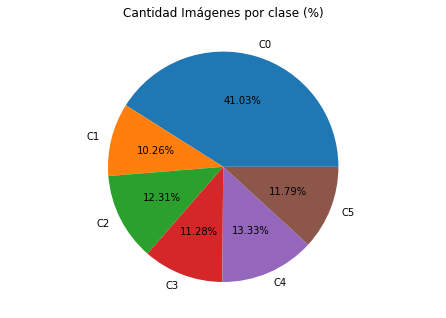

In [ ]:
# Pie Chart de los porcentajes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df_original["Categoría"])
students = list(df_original["Cantidad_Imagenes"])
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.title('Cantidad Imágenes por clase (%)')
plt.show()

Observamos que los datos de entrenamiento por clases no están balanceados. Crearemos una lista que nos indicará cuántas imágenes necesitaríamos para tener las clases balanceadas (tomando como referencia la clase con más número de imágenes).

In [ ]:
# Lista con la cantidad necesaria para conseguir un dataset balanceado 
# por cada clase (ordenada C0, C1, C2, C3, C4 y C5)
list_quantity = df_original["Cantidad_Imagenes"]
class_imb_num = []
class_imb_num.append(list_quantity[0] -list_quantity[0])
class_imb_num.append(list_quantity[0] -list_quantity[1])
class_imb_num.append(list_quantity[0] -list_quantity[2])
class_imb_num.append(list_quantity[0] -list_quantity[3])
class_imb_num.append(list_quantity[0] -list_quantity[4])
class_imb_num.append(list_quantity[0] -list_quantity[5])
class_imb_num

[0, 3000, 2800, 2900, 2700, 2850]

Mostramos un ejemplo de cada imagen de cada categoría

Ejemplo de categoría C0


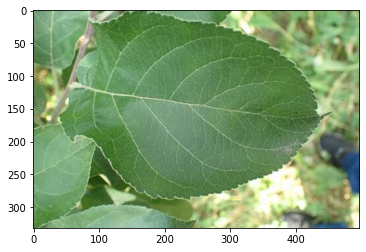

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C0


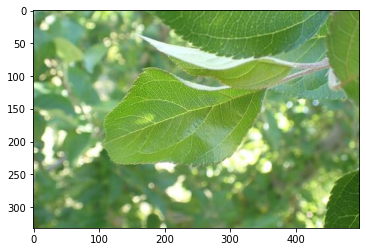

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C0


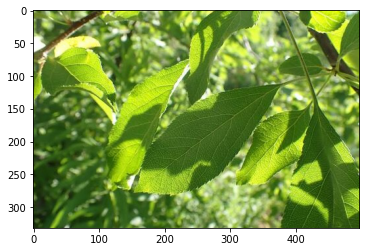

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C0


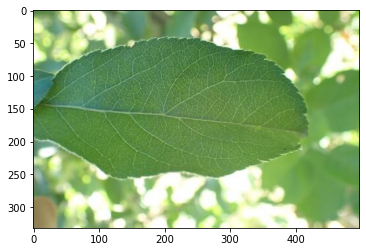

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 16

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C0


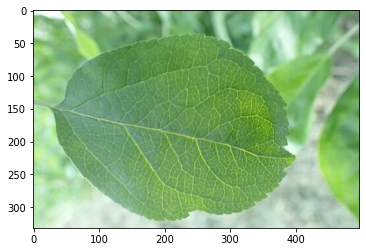

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C1


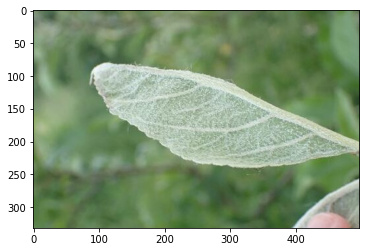

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 36

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C1


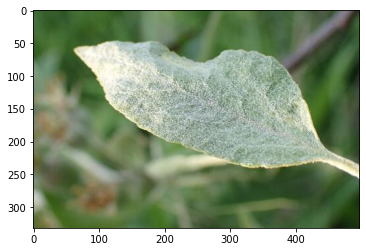

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C1


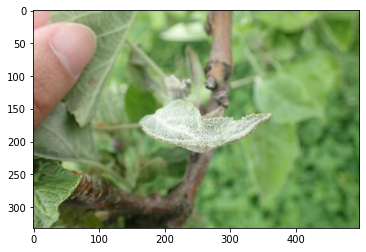

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C1


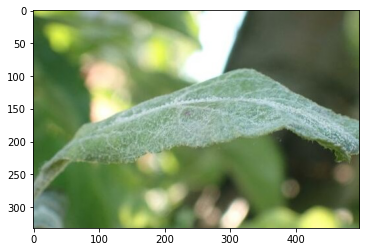

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C1


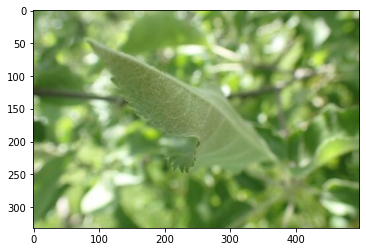

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 7

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C2


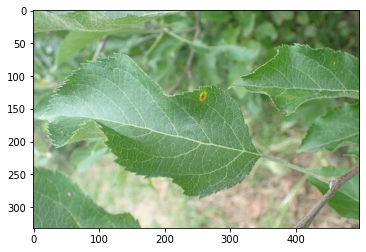

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 5

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C2


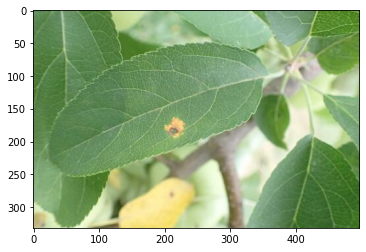

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 10

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C2


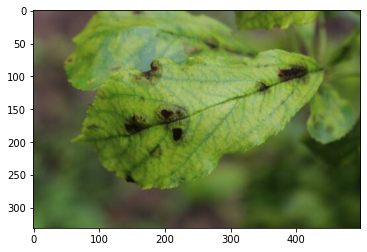

Máximo valor del pixel es: 213
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 331



Ejemplo de categoría C2


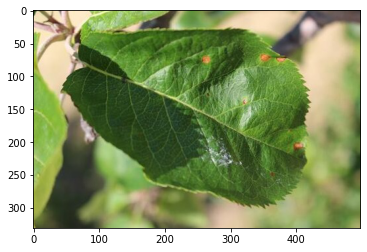

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 331



Ejemplo de categoría C2


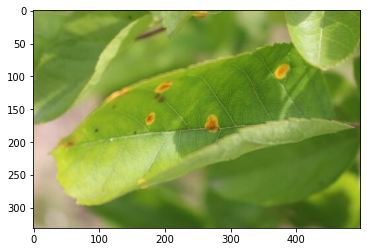

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 331



Ejemplo de categoría C3


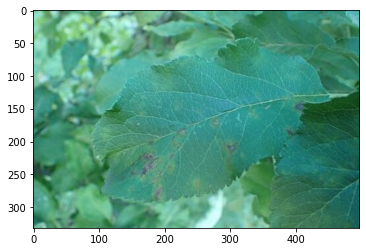

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C3


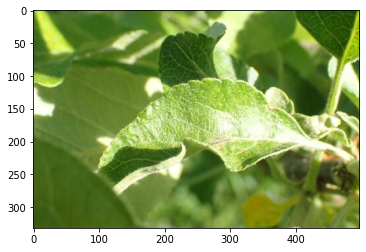

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C3


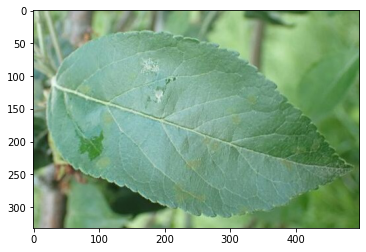

Máximo valor del pixel es: 252
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C3


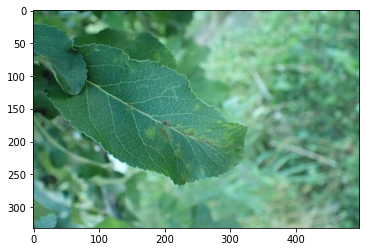

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C3


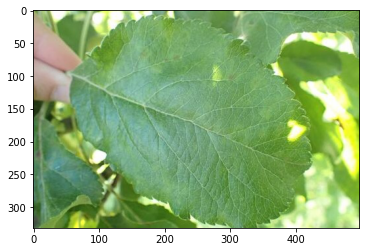

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C4


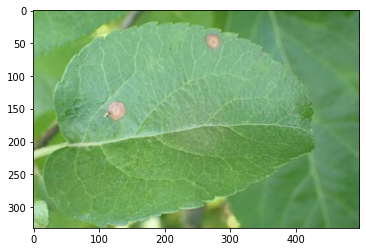

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 20

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C4


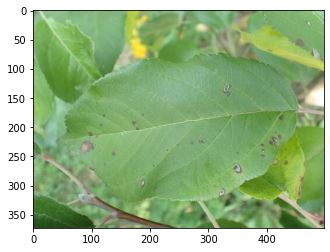

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 373



Ejemplo de categoría C4


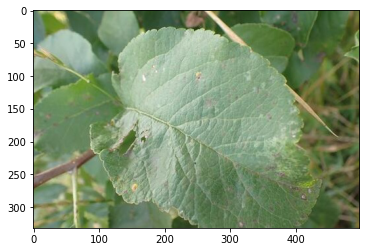

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C4


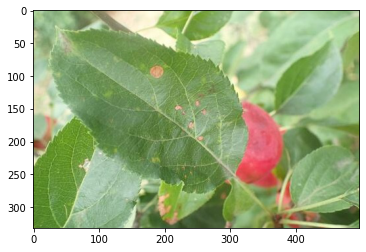

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 11

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C4


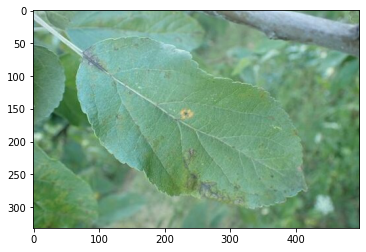

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 7

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C5


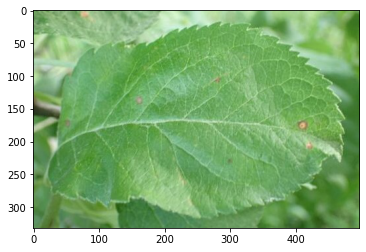

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 12

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C5


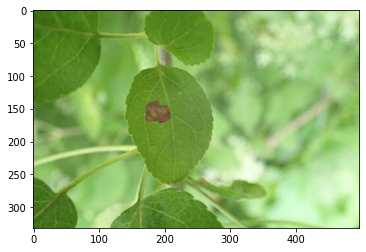

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 3

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C5


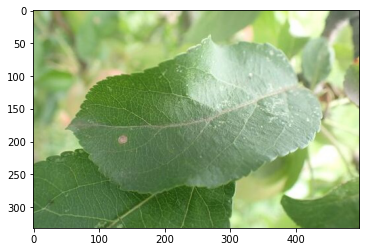

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C5


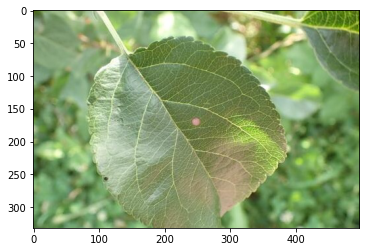

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 332



Ejemplo de categoría C5


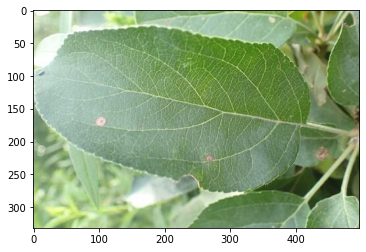

Máximo valor del pixel es: 255
Mínimo valor del pixel es: 0

Tamaño de la imagen en píxeles es: 498 x 332





In [ ]:
# Exploración de número de imágenes por categorías
# Creación función para mostrar una imagen ejemplo de cada categoría
# y su rango dinámico.

def show_pics():
    """
    Returns one sample of pic in folder for each category
    and its maximum and minimum pixel values
    """
    for i,j in enumerate(num_items_in_folders(path_train)[1]):
        img = mpimg.imread(j)
        imgplot = plt.imshow(img)
        print("Ejemplo de categoría "+
            num_items_in_folders(path_train)[2][i])
        plt.show()
        im = Image.open(j, "r")
        print("Máximo valor del pixel es: "+
            str(max([x for sets in list(im.getdata()) for x in sets])))
        print("Mínimo valor del pixel es: "+
            str(min([x for sets in list(im.getdata()) for x in sets])))
        print()
        print("Tamaño de la imagen en píxeles es: "+
            get_num_pixels(j))
        

        print()
        print()
        print()
    return

show_pics()

Hacemos una inspección de todas las fotografías del dataset y observamos que las imágenes del dataset no tienen todas el mismo tamaño de píxeles.<p>


Observamos que el ratio 498/332 es exactamente 1.5, por tanto asumiremos que a las fotografías que no tienen este ratio (pero similar) se les habría que aplicar dicho ratio por consistencia si fuera necesario.

**Rango dinámico de las imágenes:**<p>
Observamos que el rango dinámico de las fotografías varía entre 0 y 255. Esta observación está basada en la observación aleatoria de las 5 fotografías de cada categoría del dataset.

## 2. Definición de la estrategia de incremento de datos sobre el conjunto de entrenamiento.



Generaremos una función que nos incrementa las imágenes según unos parámetros fijados.<p>
Con esta función, nos aseguraremos que tengamos al menos el mismo número de imágenes que la clase de referencia (clase con máximo número de imágenes).

In [ ]:
# Generación de aumento de datos para obtener un dataset balanceado
def data_aug(path):
    list_file = os.listdir(path)
    for i in list_file:
        datagen = ImageDataGenerator(
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                vertical_flip=True,
                fill_mode='nearest')
        img = load_img(path+"/"+i)  
        x = img_to_array(img)  
        x = x.reshape((1,) + x.shape)  

        j = 0
       
        for batch in datagen.flow(x, batch_size=1,
                                save_to_dir=path,
                                save_prefix='_aug',
                                 save_format='jpg'):
            j+=1
            if j == 4:
                break  

Crearemos un path para cada carpeta donde se disponen las imágenes por clase.

In [ ]:
path_C1 = "/content/drive/MyDrive/UOCDL/PRA/dataset/train/C1"
path_C2 = "/content/drive/MyDrive/UOCDL/PRA/dataset/train/C2"
path_C3 = "/content/drive/MyDrive/UOCDL/PRA/dataset/train/C3"
path_C4 = "/content/drive/MyDrive/UOCDL/PRA/dataset/train/C4"
path_C5 = "/content/drive/MyDrive/UOCDL/PRA/dataset/train/C5"

Aumentamos las imágenes de cada clase y las almacenamos con las imágenes originales en su propia carpeta, para que tanto las imágenes originales como las aumentadas formen parte del juego de datos balanceado.

In [ ]:
data_aug(path_C1)
data_aug(path_C2)
data_aug(path_C3)
data_aug(path_C4)
data_aug(path_C5)

Limitaremos el número de imágenes de entrenamiento al número máximo de la clase de referencia, en este caso la clase C0 que contiene 4000 imágenes.

In [ ]:
pics_delete_C1 = os.listdir(path_C1)[list_quantity[0]:]  
for file_ in pics_delete_C1:
    os.remove(os.path.join(path_C1, file_))

pics_delete_C2 = os.listdir(path_C2)[list_quantity[0]:]  
for file_ in pics_delete_C2:
    os.remove(os.path.join(path_C2, file_))

pics_delete_C3 = os.listdir(path_C3)[list_quantity[0]:]  
for file_ in pics_delete_C3:
    os.remove(os.path.join(path_C3, file_))

pics_delete_C4 = os.listdir(path_C4)[list_quantity[0]:]  
for file_ in pics_delete_C4:
    os.remove(os.path.join(path_C4, file_))

pics_delete_C5 = os.listdir(path_C5)[list_quantity[0]:]  
for file_ in pics_delete_C5:
    os.remove(os.path.join(path_C5, file_))



Volvemos a realizar las tabla y pie chart del nuevo juego de entrenamiento, observando que ahora sí tenemos un juego de datos balanceado.

In [ ]:
df_balanced = num_items_in_folders(path_train)[0]
df_balanced

Categoría  Cantidad_Imagenes % Fotos por Clase
0        C0               4000             16.67
1        C1               4000             16.67
2        C2               4000             16.67
3        C3               4000             16.67
4        C4               4000             16.67
5        C5               4000             16.67

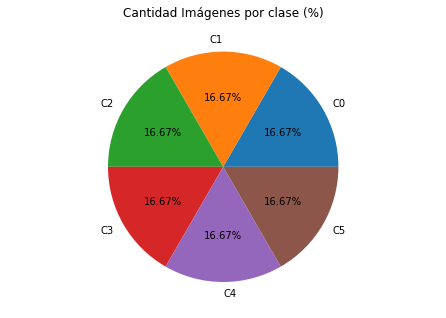

In [ ]:
# Pie Chart de los porcentajes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df_balanced["Categoría"])
students = list(df_balanced["Cantidad_Imagenes"])
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.title('Cantidad Imágenes por clase (%)')
plt.show()

Hay diferentes formas de contrarrestar el efecto de un dataset no balanceado. En nuestro caso, hemos preferido modificar las fotos existentes y extender el juego de datos hasta obtener unas clases balanceadas tomando como referencia la cantidad de imágenes de la clase predominante C0.

**El dataset está listo para ser manipulado y modelado.**